In [1]:
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from domus_analytica.config import DomusSettings
from domus_analytica.data_clean import extract_info_to_table

config = DomusSettings(_env_file=".env.local")

df = extract_info_to_table(
    config,
    {'search_time': datetime.datetime(2024, 4, 1, 14, 46, 31, 449000)}
)
df["completion_date"] = pd.to_datetime(df["completion_date"])
df["completion_date_number"] = df["completion_date"].astype(int) / (10 ** 9 * (24 * 60 * 60) * 365.25) + 1970
df["unit_price"] = df["price"] / df["exclusive_area"]
df["bus_route_pre_stop"] = df["bus_route_count"] / (df["bus_stop_count"] + 0.01)

In [2]:
df.head()

,id,name,address,price,exclusive_area,common_area,completion_date,layout_main,layout_storage_room,direction,...,bus_stop_count,bus_route_count,monthly_fee_manage,monthly_fee_repair,monthly_fee_repair_fund,monthly_fee_others,monthly_fee_total,completion_date_number,unit_price,bus_route_pre_stop
0,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7437...,モントーレブルー・ラ・メール Fukuoka,福岡県福岡市東区西戸崎２-1-30,2080.0,57.25,11.04,2007-01-01,2LDK,0,南,...,4,9,7800.0,3400.0,0,800.0,12000.0,2006.999316,36.331878,2.244389
1,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7460...,ファーネスト箱崎公園,福岡県福岡市東区松田２,2080.0,69.85,38.10,2008-06-01,3LDK,0,北西,...,14,66,7600.0,9100.0,0,0.0,16700.0,2008.414784,29.778096,4.710921
2,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7250...,Asobi+ JGMヴェルデ香椎南弐番館,福岡県福岡市東区八田１,2490.0,93.33,24.55,2001-06-01,4LDK,0,南東,...,19,150,7500.0,14900.0,0,0.0,22400.0,2001.414100,26.679524,7.890584
3,/ms/chuko/fukuoka/sc_fukuokashiminami/nc_73552...,エイルヴィラクレアテュール井尻南II,福岡県福岡市南区曰佐２,2580.0,75.42,20.88,1999-05-01,3LDK,0,南西,...,36,65,7430.0,8300.0,0,0.0,15730.0,1999.327858,34.208433,1.805054
4,/ms/chuko/fukuoka/sc_fukuokashihakata/nc_74582...,アンピール吉塚,福岡県福岡市博多区吉塚６,2780.0,65.10,14.00,2000-11-01,3LDK,0,南東,...,21,166,5200.0,6840.0,0,0.0,12040.0,2000.833676,42.703533,7.901000


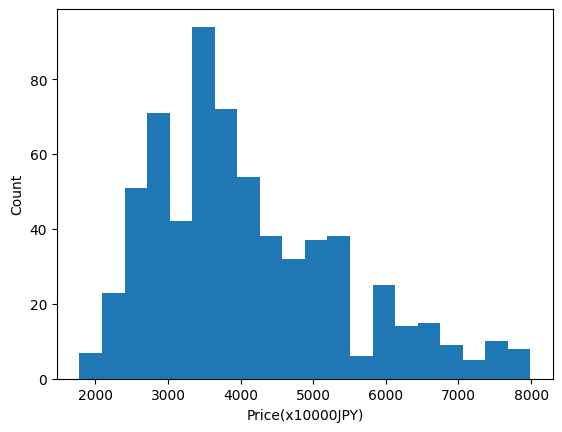

In [3]:
plt.hist(df["price"], bins=20)
plt.xlabel("Price(x10000JPY)")
_ = plt.ylabel("Count")

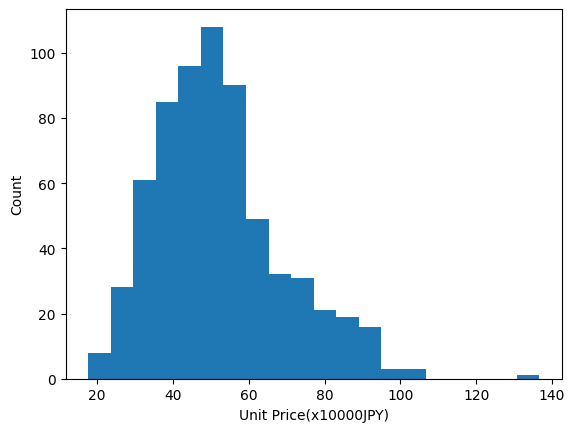

In [4]:
plt.hist(df["unit_price"], bins=20)
plt.xlabel("Unit Price(x10000JPY)")
_ = plt.ylabel("Count")

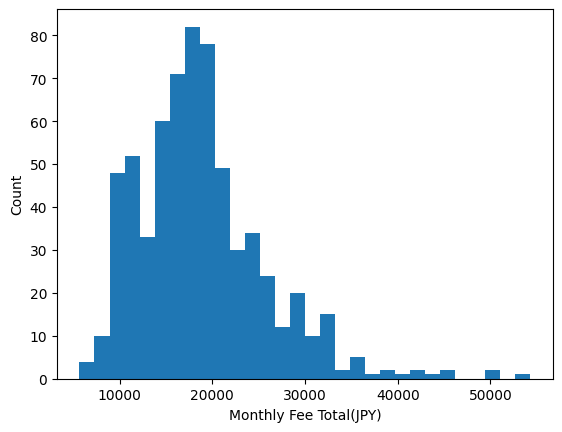

In [5]:
plt.hist(df["monthly_fee_total"], bins=30)
plt.xlabel("Monthly Fee Total(JPY)")
_ = plt.ylabel("Count")

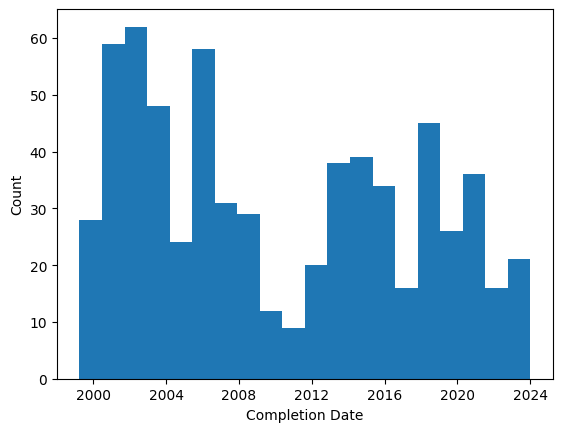

In [6]:
_ = plt.hist(df["completion_date"], bins=20)
plt.xlabel("Completion Date")
_ = plt.ylabel("Count")

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


def lr_analysis(x, y):
    m = LinearRegression()
    m.fit(x, y)
    print(f"R^2 = {m.score(x, y):.5f}")
    plt.scatter(x, y)
    plt.plot(x, m.predict(x))


def non_linear_analysis(x, y):
    m = SVR(kernel="rbf")
    m.fit(x, y)
    print(f"R^2 = {m.score(x, y):.5f}")
    plt.scatter(x, y)
    x_s = x.sort_values(by=[s for s in x.columns])
    plt.plot(x_s, m.predict(x_s))

R^2 = 0.17665


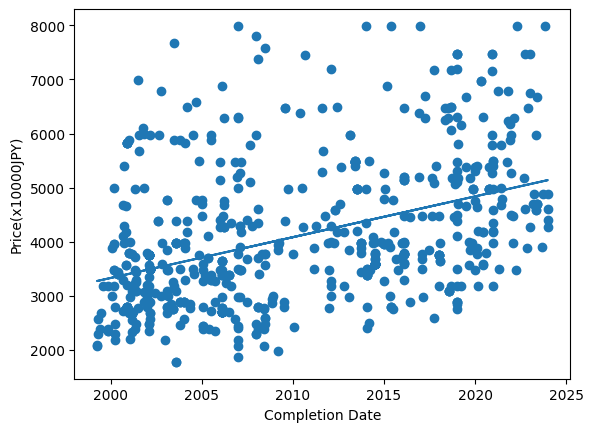

In [8]:
lr_analysis(df[["completion_date_number"]], df["price"])
plt.xlabel("Completion Date")
_ = plt.ylabel("Price(x10000JPY)")

R^2 = 0.25736


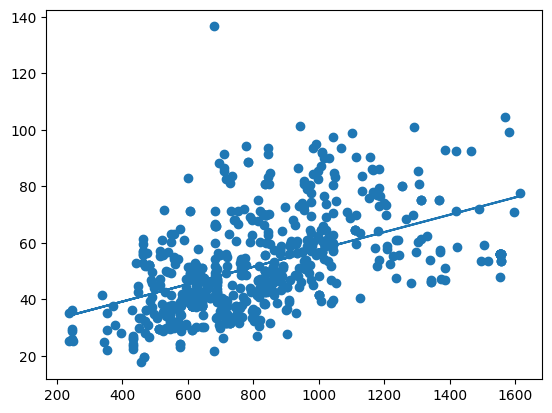

In [9]:
lr_analysis(df[["population_estimation_mean"]], df["unit_price"])

R^2 = 0.34577


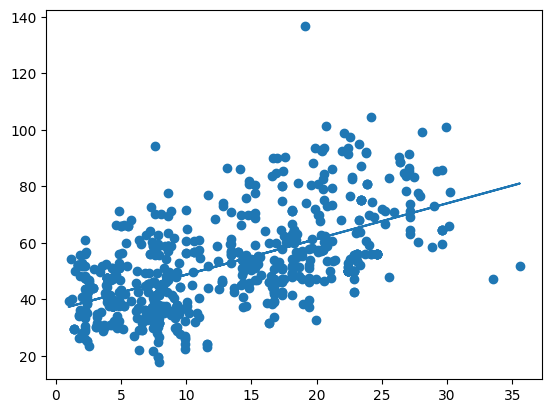

In [10]:
lr_analysis(df[["bus_route_pre_stop"]], df["unit_price"])

R^2 = 0.94850


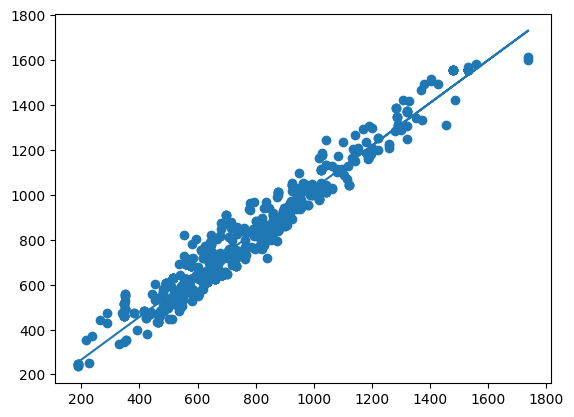

In [11]:
lr_analysis(df[["population_estimation_median"]], df["population_estimation_mean"])

R^2 = 0.30502


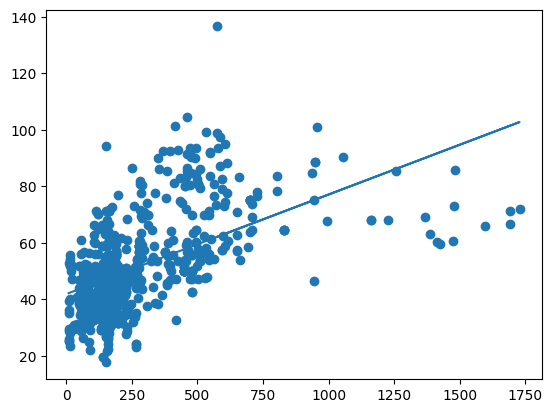

In [12]:
lr_analysis(df[["bus_route_count"]], df["unit_price"])

R^2 = -0.04931


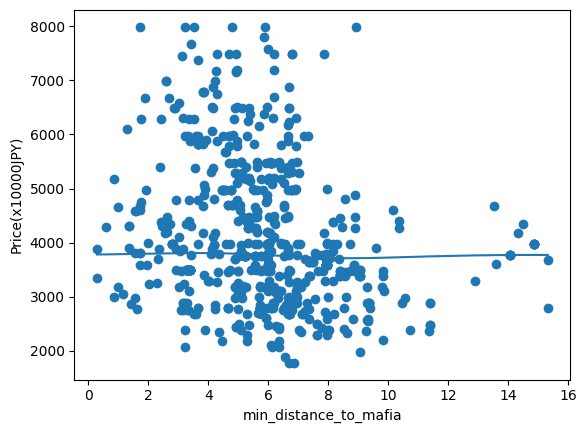

In [13]:
non_linear_analysis(df[["min_distance_to_mafia"]], df["price"])
plt.xlabel("min_distance_to_mafia")
_ = plt.ylabel("Price(x10000JPY)")

R^2 = -0.05470


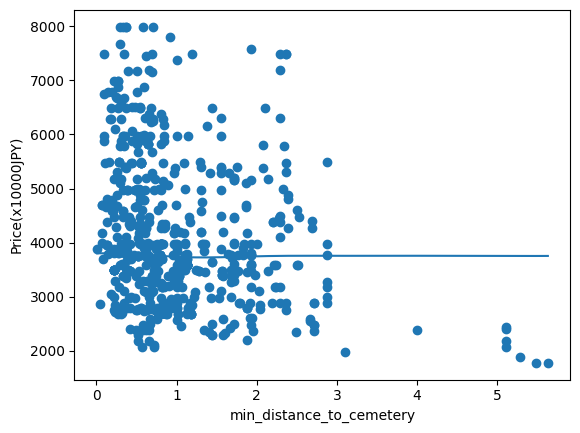

In [14]:
non_linear_analysis(df[["min_distance_to_cemetery"]], df["price"])
plt.xlabel("min_distance_to_cemetery")
_ = plt.ylabel("Price(x10000JPY)")

R^2 = 0.19955


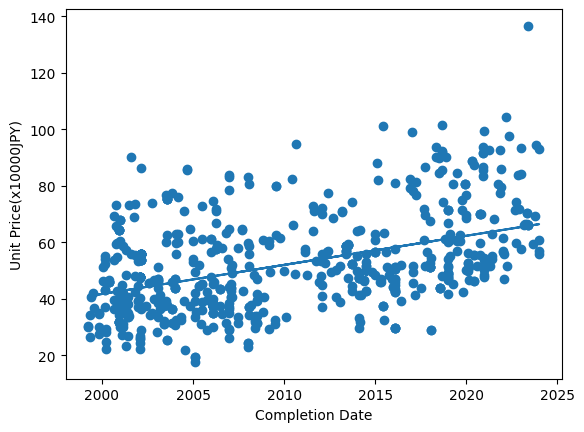

In [15]:
lr_analysis(df[["completion_date_number"]], df["unit_price"])
plt.xlabel("Completion Date")
_ = plt.ylabel("Unit Price(x10000JPY)")

R^2 = 0.02502


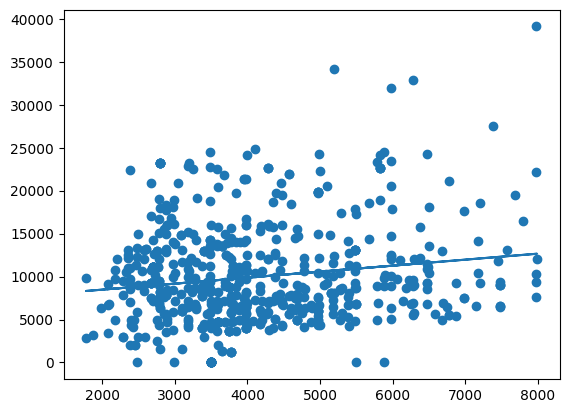

In [16]:
lr_analysis(df[["price"]], df["monthly_fee_repair"])

R^2 = 0.03678


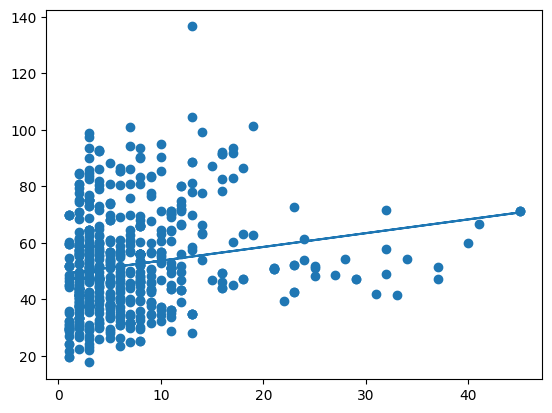

In [17]:
lr_analysis(df[["floor"]], df["unit_price"])

R^2 = 0.03645


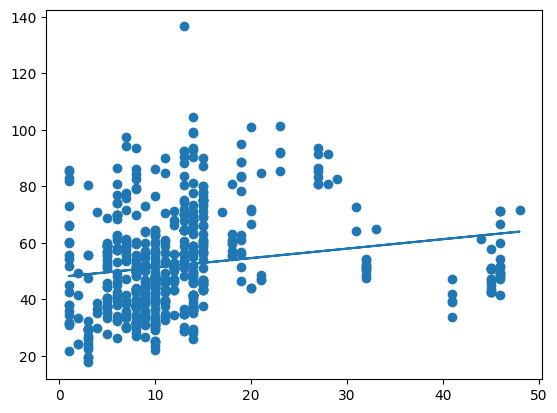

In [18]:
lr_analysis(df[["total_floors"]], df["unit_price"])

R^2 = 0.09866


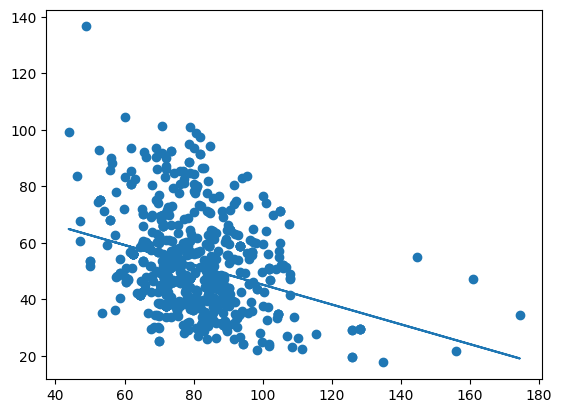

In [19]:
lr_analysis(df[["exclusive_area"]], df["unit_price"])

R^2 = 0.16266


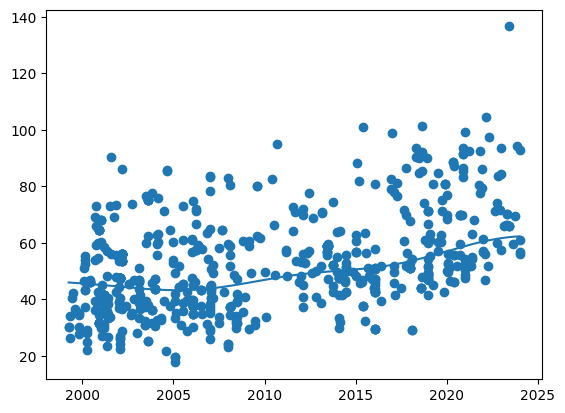

In [20]:
non_linear_analysis(df[["completion_date_number"]], df["unit_price"])